In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# Load your dataset
data = pd.read_csv('\ML Model\student performance.csv')  # Replace with your actual file path

data.head()

<ipython-input-4-9429f5ed31d0>:2: DtypeWarning: Columns (4,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Fact.csv')  # Replace with your actual file path


,Student_ID,Father_Degree_ID,Mother_Degree_ID,Education_Type_ID,Student_Name,Student_Age,Student_Year,Father_Degree,Mother_Degree,Education_Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10
0,1.0,2.0,2.0,2.0,Allison Lang,18.0,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678
1,2.0,1.0,4.0,2.0,Jaclyn Mcneil,14.0,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158
2,3.0,3.0,4.0,2.0,Melissa Lee,16.0,Year 10,NaN,PhD,IB,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634
3,4.0,1.0,1.0,3.0,Timothy Maxwell,14.0,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706
4,5.0,4.0,3.0,1.0,Eric Steele,17.0,Year 11,PhD,NaN,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         50000 non-null  float64
 1   Father_Degree_ID   50000 non-null  float64
 2   Mother_Degree_ID   50000 non-null  float64
 3   Education_Type_ID  50000 non-null  float64
 4   Student_Name       50000 non-null  object 
 5   Student_Age        50000 non-null  float64
 6   Student_Year       50000 non-null  object 
 7   Father_Degree      39960 non-null  object 
 8   Mother_Degree      39910 non-null  object 
 9   Education_Type     50000 non-null  object 
 10  Subject_1          50000 non-null  float64
 11  Subject_2          50000 non-null  float64
 12  Subject_3          50000 non-null  float64
 13  Subject_4          50000 non-null  float64
 14  Subject_5          50000 non-null  float64
 15  Subject_6          50000 non-null  float64
 16  Subject_7          50

In [ ]:
data.isnull().sum()

,0
Student_ID,0
Father_Degree_ID,0
Mother_Degree_ID,0
Education_Type_ID,0
Student_Name,0
Student_Age,0
Student_Year,0
Father_Degree,0
Mother_Degree,0
Education_Type,0


In [ ]:
data.describe()

,Student_ID,Father_Degree_ID,Mother_Degree_ID,Education_Type_ID,Student_Age,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2.983900,2.996640,2.001340,16.00368,74.730855,74.697132,74.658231,74.789693,74.610735,74.741407,74.690653,74.734522,74.710284,74.689639
std,14433.901067,1.412048,1.413417,0.812694,1.41582,14.345020,14.367525,14.330384,14.366513,14.326871,14.408353,14.348436,14.373802,14.355054,14.365250
min,1.000000,1.000000,1.000000,1.000000,14.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,12500.750000,2.000000,2.000000,1.000000,15.00000,64.918132,64.786097,64.870431,64.884569,64.752157,64.837589,64.944466,64.985014,64.977238,64.845485
50%,25000.500000,3.000000,3.000000,2.000000,16.00000,75.050027,74.916854,74.959196,75.045955,74.920325,75.083056,74.966657,74.949263,75.033263,74.987325
75%,37500.250000,4.000000,4.000000,3.000000,17.00000,85.145231,85.139383,84.972541,85.268959,84.984459,85.208810,85.071789,85.119971,85.152224,85.087438
max,50000.000000,5.000000,5.000000,3.000000,18.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
# Check for NaN values in the dataset
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('unknown')

In [ ]:
# Encode categorical variables
for column in categorical_cols:
    data[column] = data[column].astype('category').cat.codes

In [ ]:
# Define features and target variable
target_variable = 'Student_Year'  # Target variable
X = data.drop(columns=['Student_ID', 'Student_Name', target_variable, 'Student_Age'])
y = data[target_variable]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make Predictions
y_pred = model.predict(X_test_scaled)
y_pred

array([3.84804574, 3.84804574, 2.30308187, ..., 0.83610892, 3.84804574,
       2.51613208])

In [ ]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.8391391654858162
R^2 Score: 0.6142479830936537
Mean Absolute Error: 0.6212079387790859


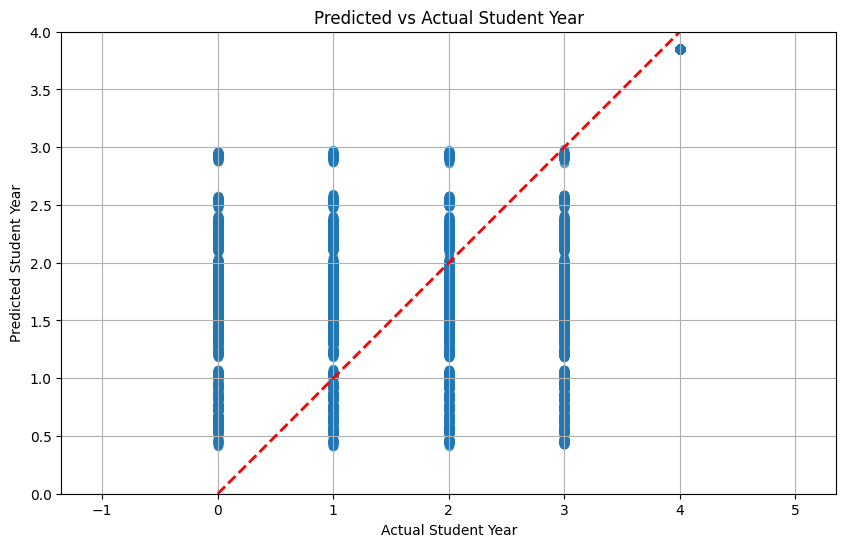

In [ ]:
# Visualization: Predicted vs. Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Line for perfect predictions
plt.title('Predicted vs Actual Student Year')
plt.xlabel('Actual Student Year')
plt.ylabel('Predicted Student Year')
plt.grid()
plt.axis('equal')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.show()

In [ ]:
# Display Actual vs. Predicted Results
results_df = pd.DataFrame({
    'Actual Student Year': y_test,
    'Predicted Student Year': y_pred
})

In [ ]:
print("\nActual vs Predicted Results:")
print(results_df.reset_index(drop=True))


Actual vs Predicted Results:
       Actual Student Year  Predicted Student Year
0                        4                3.848046
1                        4                3.848046
2                        1                2.303082
3                        4                3.848046
4                        4                3.848046
...                    ...                     ...
19995                    1                1.827549
19996                    2                1.571357
19997                    1                0.836109
19998                    4                3.848046
19999                    0                2.516132

[20000 rows x 2 columns]
